# Visualizing LSD Math-Score Data with Matplotlib

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data= pd.read_csv('lsd_math_score_data.csv')

In [18]:
time  = data['Time_Delay_in_Minutes']
LSD   = data[['LSD_ppm']] # changing to DataFrame for regr.fit()
score = data[['Avg_Math_Test_Score']] # same reason as above
# each yields a Series for plotting

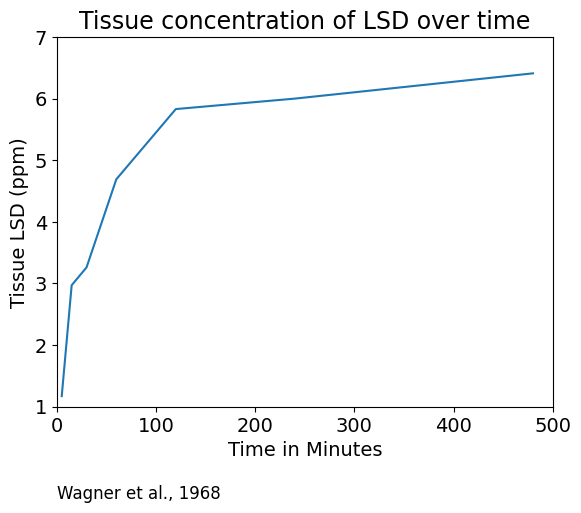

In [4]:
%matplotlib inline

plt.title('Tissue concentration of LSD over time', fontsize=17)
# Axis labels
plt.xlabel('Time in Minutes',        fontsize=14)
plt.ylabel('Tissue LSD (ppm)',       fontsize=14)
# Footernote
plt.text(0, -0.5, 'Wagner et al., 1968', fontsize=12)
# Fonts for axis labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Axis limits
plt.xlim(0, 500)
plt.ylim(1, 7)

# Basic Plotting
plt.plot(time, LSD)
plt.show()

- Keyword args (kwargs):

color='G' or hex '#E74C3C' for custom palettes (e.g., from Flat UI Colors).

linewidth=3 to thicken the line.

Consult matplotlib documentation under plot for available kwargs.

- Adding text elements:

Title: plt.title('Tissue concentration of LSD over time', fontsize=17)

## Matplotlib styles:

Built‑in templates: e.g., 'classic', 'dark_background', 'ggplot'.

Apply via plt.style.use(<style_name>) to reduce manual styling.

- Jupyter inline: add magic %matplotlib inline to embed figures in exported notebooks.

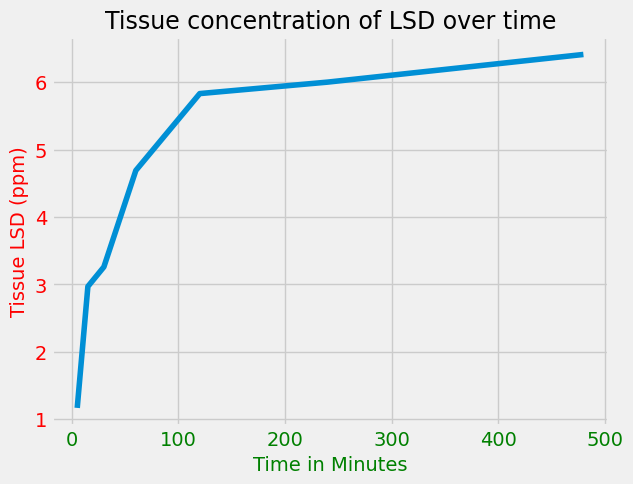

In [14]:
plt.style.use('fivethirtyeight')  # Apply a style
plt.title('Tissue concentration of LSD over time', fontsize=17, color='black')
plt.xlabel('Time in Minutes',  fontsize=14, color= 'green')
plt.ylabel('Tissue LSD (ppm)',  fontsize=14, color= 'red')
plt.xticks(color='green')
plt.yticks(color='red')
plt.plot(time, LSD)
plt.show()

**Key Terms / Questions**
- Series vs. DataFrame
- plt.plot(), plt.show()
- Keyword arguments (color=, linewidth=, fontsize=)
- plt.text() annotation
- plt.xticks(), plt.yticks()
- plt.xlim(), plt.ylim()
- plt.style.use() templates
- %matplotlib inline
- Q: How can you save the figure to an external image file?
- Q: When is a scatter plot preferred over a line plot?

**Summary**

We loaded the LSD–score dataset into pandas, extracted each column as a Series, and used Matplotlib to plot tissue concentration over time. By leveraging keyword arguments, we customized color (including hex palettes), line width, labels, title, annotations, tick fonts, axis limits, and plot styles, then embedded the resulting chart inline for documentation and sharing.

## Applying Linear Regression

In [17]:
regr = LinearRegression()

**DataFrames vs. Series:**

Extracting with single data['col'] → Series → incompatible with fit().

Use double brackets data[['col']] → DataFrame → correct shape for scikit‑learn (n×1).

In [41]:
regr.fit(LSD, score)
predictions= regr.predict(LSD)

In [32]:
Theta1= regr.coef_[0][0]  # Coefficient, nested array
Theta0= regr.intercept_[0]  # Intercept, array

In [31]:
print(f'The Slope of Graph: {Theta1}\nThe Intercept of Graph: {Theta0}')

The Slope of Graph: -9.009466415296783
The Intercept of Graph: 89.12387376799306


In [33]:
r2= regr.score(LSD, score)
print(f'The R^2 value of the model: {r2}')

The R^2 value of the model: 0.8778349707775888


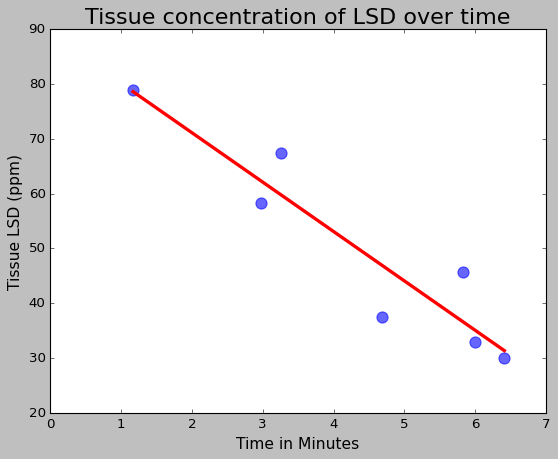

In [42]:
%matplotlib inline

plt.title('Tissue concentration of LSD over time', fontsize=20)
plt.xlabel('Time in Minutes',  fontsize=14)
plt.ylabel('Tissue LSD (ppm)',  fontsize=14)

plt.scatter(LSD, score, color='blue', s=100, alpha= 0.6)
plt.plot(LSD, predictions, color='red', linewidth=3)
plt.style.use('classic')
plt.show()

Key Terms / Questions
- LinearRegression.fit()
- Series vs. DataFrame (shape compatibility)
- coef_, intercept_ arrays
- score() (R²)
- plt.scatter() kwargs: color, s (size), alpha
- plt.plot() overlay
- Axis styling (xlim, ylim, titles, labels)
- Plot styles (plt.style.use)
- Q: How would you validate the model on held‑out data?
- Q: What transformation might improve linearity?

**Summary**

We extracted the LSD concentration and test‑score columns as DataFrames, fitted a LinearRegression model (yielding a negative slope ≈ –9.0 and intercept ≈ 89.1), and measured 
𝑅^2 ≈ 0.88

 A customized Matplotlib scatter plot with blue semi‑transparent markers and an overlaid red regression line vividly illustrates how increased LSD levels correlate with decreased math performance—closely reproducing the original 1968 study’s findings.